/home/m_bobrin/miniconda3/envs/jax/lib/python3.10/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group
/home/m_bobrin/miniconda3/envs/jax/lib/python3.10/site-packages/Cython/Distutils/old_build_ext.py:15: DeprecationWarning: dep_util is Deprecated. Use functions from setuptools instead.
  from distutils.dep_util import newer, newer_group
<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


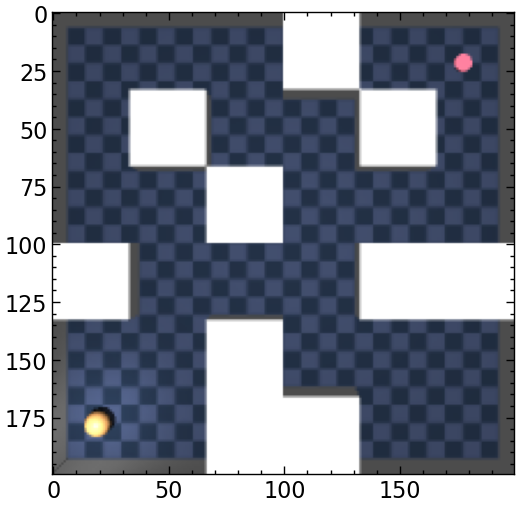

In [1]:
import dotenv
dotenv.load_dotenv(".env", override=True)

import os
os.environ['MUJOCO_GL']='egl'
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook'])
import mediapy

import gymnasium as gym
import ogbench

env, train_dataset, val_dataset = ogbench.make_env_and_datasets(dataset_name="pointmaze-medium-navigate-singletask-v0", env_only=False)
env.reset()
plt.imshow(env.render())

In [3]:
os.environ.get('LD_LIBRARY_PATH')

'/home/m_bobrin/miniconda3/envs/jax/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda-12.6/lib64:/usr/lib/nvidia:/home/m_bobrin/.mujoco/mujoco210/bin'

In [ ]:
from impls.agents.crl import get_config, CRLAgent
from impls.utils.datasets import Dataset, GCDataset

sac_config = get_config()
dataset = GCDataset(Dataset.create(**train_dataset), config=sac_config)
sac = CRLAgent.create(
    seed=42,
    ex_observations=train_dataset['observations'][0],
    ex_actions=train_dataset['actions'][0],
    config=sac_config
)
test_batch = dataset.sample(256)
sac.update(test_batch)

XlaRuntimeError: INTERNAL: the library was not initialized

: 